In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [58]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [59]:
#drop mont,year, and day
df.drop(['month','day','year'],axis=1,inplace=True)

In [60]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [61]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [62]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [63]:
#Encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [64]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [65]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [66]:
#Independent features and Dependent features
x=df.drop('FWI',axis=1)
y=df['FWI']

In [67]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [68]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [69]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [70]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.632603,-0.276940,-0.330300,0.696636,0.485381,0.402618,0.612643,0.469295,0.544552,0.217014
RH,-0.632603,1.000000,0.284878,0.216989,-0.648727,-0.430816,-0.268378,-0.674245,-0.385272,-0.429688,-0.382272
Ws,-0.276940,0.284878,1.000000,0.187858,-0.202555,-0.023306,0.058029,-0.028594,0.009506,-0.128823,-0.205389
Rain,-0.330300,0.216989,0.187858,1.000000,-0.528326,-0.279693,-0.289968,-0.338240,-0.290936,-0.360923,-0.050380
FFMC,0.696636,-0.648727,-0.202555,-0.528326,1.000000,0.616007,0.522644,0.749150,0.607508,0.777949,0.213566
DMC,0.485381,-0.430816,-0.023306,-0.279693,0.616007,1.000000,0.878280,0.691288,0.982519,0.606479,0.194447
DC,0.402618,-0.268378,0.058029,-0.289968,0.522644,0.878280,1.000000,0.530794,0.941766,0.528517,-0.062961
ISI,0.612643,-0.674245,-0.028594,-0.338240,0.749150,0.691288,0.530794,1.000000,0.662441,0.751002,0.235096
BUI,0.469295,-0.385272,0.009506,-0.290936,0.607508,0.982519,0.941766,0.662441,1.000000,0.610694,0.096437
Classes,0.544552,-0.429688,-0.128823,-0.360923,0.777949,0.606479,0.528517,0.751002,0.610694,1.000000,0.132260


<Axes: >

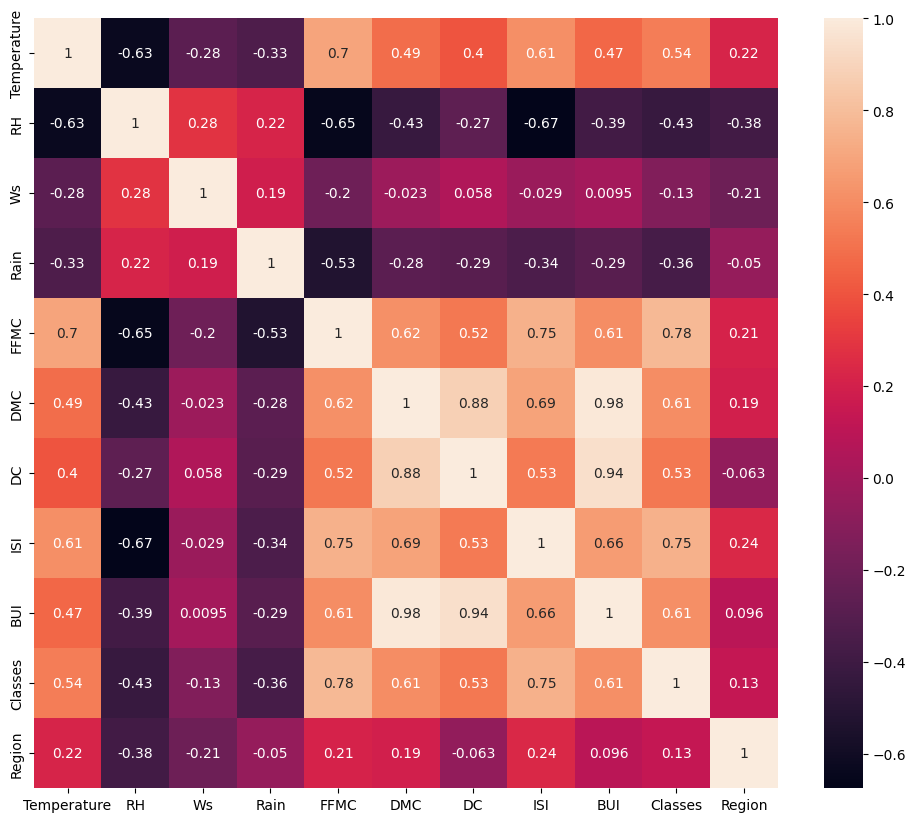

In [71]:
#check for multicollinearity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [72]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [73]:
#threshold will  be set by domain expeertie
corr_features=correlation(x_train,0.85)
corr_features

{'BUI', 'DC'}

In [74]:
#drop features when correlation is more than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [75]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
41,31,75,13,0.1,75.1,7.9,1.5,0,0
112,31,55,11,0.0,87.8,16.5,5.4,1,0
133,27,58,17,0.0,88.9,21.3,8.7,1,1
91,28,80,21,16.8,52.5,8.7,0.6,0,0
37,33,68,19,0.0,85.6,12.5,6.0,1,0
...,...,...,...,...,...,...,...,...,...
80,35,68,19,0.0,88.3,25.9,8.8,1,0
226,28,81,15,0.0,84.6,12.6,4.3,1,1
140,32,67,14,4.5,64.6,4.4,1.0,0,1
163,36,44,13,0.0,90.1,12.6,8.3,1,1


In [76]:
y_train

41      0.9
112     8.3
133    12.9
91      0.3
37      8.0
       ... 
80     16.8
226     5.7
140     0.4
163     9.6
192    21.6
Name: FWI, Length: 182, dtype: float64

Feature Scaling or Standardization

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [78]:
x_train_scaled

array([[-0.27688003,  0.85321886, -0.87860649, ..., -0.75597877,
        -1.08012345, -1.        ],
       [-0.27688003, -0.50298928, -1.57084191, ...,  0.16190308,
         0.9258201 , -1.        ],
       [-1.36644038, -0.29955806,  0.50586434, ...,  0.93857234,
         0.9258201 ,  1.        ],
       ...,
       [-0.00448995,  0.3107356 , -0.53248878, ..., -0.87365593,
        -1.08012345,  1.        ],
       [ 1.0850704 , -1.24890376, -0.87860649, ...,  0.84443061,
         0.9258201 ,  1.        ],
       [ 2.17463074, -2.13043906, -0.18637107, ...,  2.79787148,
         0.9258201 ,  1.        ]])

Text(0.5, 1.0, 'x_trian After scaling')

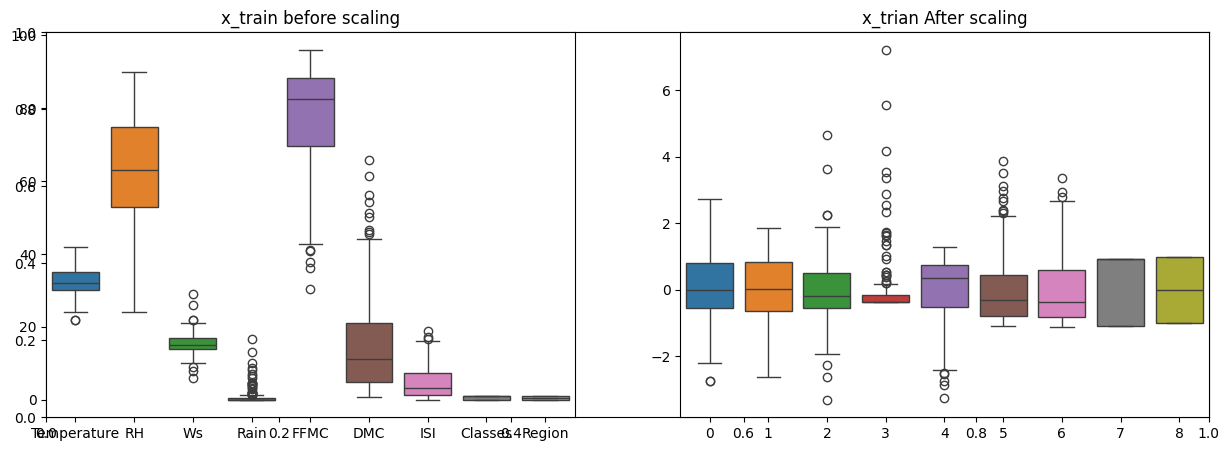

In [79]:
#BOX plot to understand Effect of Standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_trian After scaling')

Linear Regression Model

In [80]:
from sklearn.linear_model import LinearRegression
li=LinearRegression()

In [81]:
li.fit(x_train_scaled,y_train)

LinearRegression()

In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
y_pred=li.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)

Mean absolute error 0.5670984536749395
R2 score 0.9826446263791836


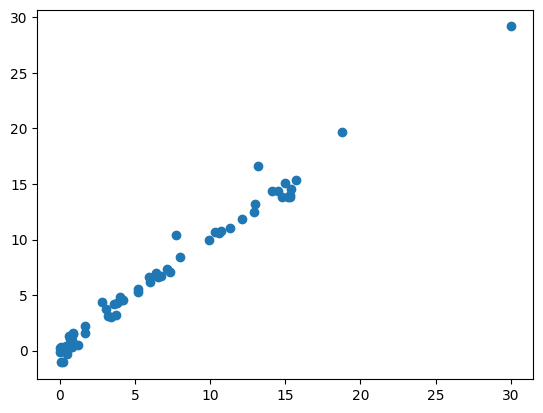

In [83]:
plt.scatter(y_test,y_pred)

#Lasso regression 

In [84]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train_scaled,y_train)

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
y_pred=ls.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)

Mean absolute error 1.0185004953444188
R2 score 0.9588635787062445


#Ridge regression

In [85]:
from sklearn.linear_model import Ridge
rg=Ridge()
rg.fit(x_train_scaled,y_train)

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
y_pred=rg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)

Mean absolute error 0.5827892685716025
R2 score 0.9820278233054311


#Elastic net Regression

In [86]:
from sklearn.linear_model import ElasticNet
el=ElasticNet()
el.fit(x_train_scaled,y_train)

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
y_pred=el.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)

Mean absolute error 1.6607844178200581
R2 score 0.8913710465793633


In [87]:
#Cross Validation Lasso LassoCV

In [88]:
from sklearn.linear_model import LassoCV
lscv=LassoCV(cv=5)
lscv.fit(x_train_scaled,y_train)
y_pred=lscv.predict(x_test_scaled)
lscv.alphas_

array([7.13611893, 6.6551684 , 6.20663233, 5.78832608, 5.39821227,
       5.03439083, 4.69508974, 4.37865641, 4.08354962, 3.80833204,
       3.55166321, 3.312293  , 3.08905553, 2.88086353, 2.68670297,
       2.50562818, 2.33675723, 2.17926761, 2.03239227, 1.89541583,
       1.76767115, 1.64853603, 1.53743022, 1.43381257, 1.3371784 ,
       1.24705705, 1.16300958, 1.08462663, 1.01152642, 0.94335293,
       0.8797741 , 0.82048027, 0.76518264, 0.71361189, 0.66551684,
       0.62066323, 0.57883261, 0.53982123, 0.50343908, 0.46950897,
       0.43786564, 0.40835496, 0.3808332 , 0.35516632, 0.3312293 ,
       0.30890555, 0.28808635, 0.2686703 , 0.25056282, 0.23367572,
       0.21792676, 0.20323923, 0.18954158, 0.17676711, 0.1648536 ,
       0.15374302, 0.14338126, 0.13371784, 0.12470571, 0.11630096,
       0.10846266, 0.10115264, 0.09433529, 0.08797741, 0.08204803,
       0.07651826, 0.07136119, 0.06655168, 0.06206632, 0.05788326,
       0.05398212, 0.05034391, 0.0469509 , 0.04378656, 0.04083

In [89]:
len(lscv.mse_path_)*5

500

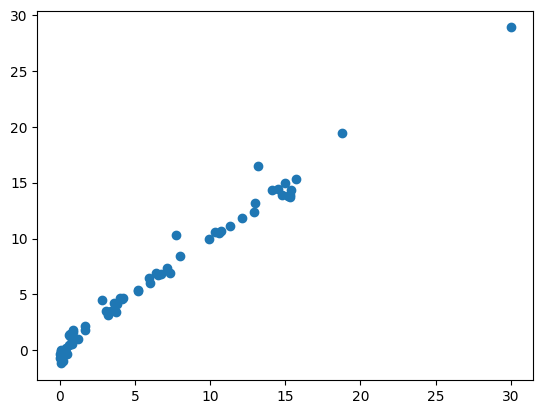

In [90]:
y_pred=lscv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
y_pred=lscv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)

Mean absolute error 0.5672525485685986
R2 score 0.9823446955928771


RidgeCV ridge with cross validation

In [92]:
from sklearn.linear_model import RidgeCV
ridge=RidgeCV(cv=5)
ridge.fit(x_train_scaled,y_train)

RidgeCV(cv=5)

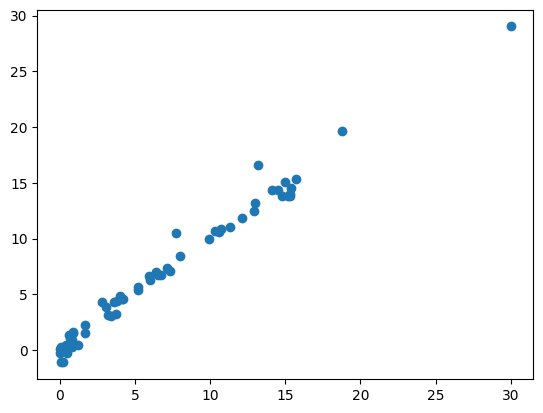

In [93]:
y_pred=ridge.predict(x_test_scaled)
plt.scatter(y_test,y_pred)

In [94]:
ridge.alpha_

1.0

In [95]:
ridge.alphas

(0.1, 1.0, 10.0)

In [96]:
ridge.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [97]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)

Mean absolute error 0.5827892685716025
R2 score 0.9820278233054311


In [98]:
#ElasticCV

Mean absolute error 0.6232227951872517
R2 score 0.9804360060079451


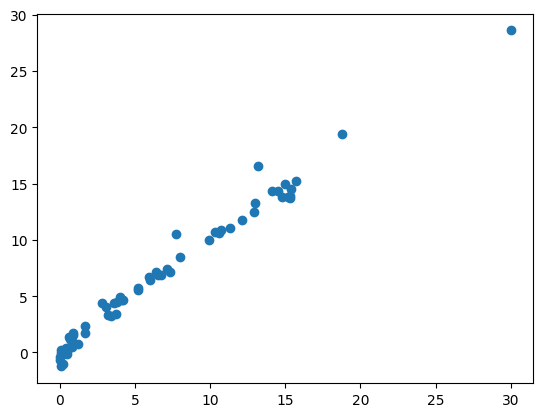

In [99]:
from sklearn.linear_model import ElasticNetCV
elcv=ElasticNetCV(cv=5)
elcv.fit(x_train_scaled,y_train)
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
y_pred=elcv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

In [100]:
elcv.alpha_

0.03535342296829136

In [101]:
elcv.alphas_

array([14.27223787, 13.3103368 , 12.41326465, 11.57665216, 10.79642455,
       10.06878167,  9.39017948,  8.75731281,  8.16709924,  7.61666409,
        7.10332642,  6.62458599,  6.17811107,  5.76172706,  5.37340594,
        5.01125636,  4.67351446,  4.35853522,  4.06478454,  3.79083166,
        3.5353423 ,  3.29707206,  3.07486044,  2.86762513,  2.6743568 ,
        2.4941141 ,  2.32601916,  2.16925325,  2.02305284,  1.88670585,
        1.75954819,  1.64096053,  1.53036528,  1.42722379,  1.33103368,
        1.24132647,  1.15766522,  1.07964245,  1.00687817,  0.93901795,
        0.87573128,  0.81670992,  0.76166641,  0.71033264,  0.6624586 ,
        0.61781111,  0.57617271,  0.53734059,  0.50112564,  0.46735145,
        0.43585352,  0.40647845,  0.37908317,  0.35353423,  0.32970721,
        0.30748604,  0.28676251,  0.26743568,  0.24941141,  0.23260192,
        0.21692533,  0.20230528,  0.18867059,  0.17595482,  0.16409605,
        0.15303653,  0.14272238,  0.13310337,  0.12413265,  0.11

In [102]:
elcv.mse_path_

array([[33.74709201, 61.38854973, 66.93856863, 76.31244485, 70.62682529],
       [32.83701298, 60.16629348, 66.27288766, 76.17237602, 70.30056415],
       [31.9048786 , 58.53666639, 64.52384253, 74.89669938, 68.40814787],
       [30.95255664, 56.86551621, 62.65755577, 72.79197315, 66.46517094],
       [29.80796937, 55.15602036, 60.63029881, 70.63478349, 64.45031808],
       [28.37547755, 53.20901159, 58.32139108, 68.16443874, 62.03344748],
       [26.91426038, 50.80391142, 55.79319345, 65.35817841, 59.46610625],
       [25.4831315 , 48.37800056, 53.23977483, 62.44352103, 56.76971146],
       [24.06300366, 45.9880105 , 50.71936025, 59.56073449, 54.10703896],
       [22.68783869, 43.64129943, 48.23954941, 56.71867496, 51.48620638],
       [21.36998406, 41.33001361, 45.80757533, 53.8789926 , 48.91495277],
       [20.11105452, 38.9876606 , 43.32961481, 51.09471697, 46.39815897],
       [18.91210369, 36.65085219, 40.90408095, 48.30517332, 43.8106004 ],
       [17.7736397 , 34.41525481, 38.5

In [103]:
#pickle the machine learning models,preprocessing model standard scaler

In [104]:
scaler

StandardScaler()

In [105]:
rg

Ridge()

In [106]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rg,open('ridge.pkl','wb'))